In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("clustered_df.csv")
df=df.sample(n=5000,random_state=42).reset_index(drop=True)


In [3]:
df.head()

,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,1501,0.6880,1980,0.0311,['Nazareth'],0.615,216253,0.834,0,4HoTskE5N0oEM4CKRfuzFI,...,7,0.1430,-5.726,1,Holiday,29,1980,0.0318,131.606,1
1,2586,0.0391,1942,0.9890,"['Giacomo Puccini', 'Leontyne Price', 'Erich L...",0.290,299120,0.167,0,2VtUcZ1yowXnhotD3yPAaW,...,1,0.2900,-15.035,1,"Un bel dì (From ""Madama Butterfly"")",0,1942,0.0450,104.500,2
2,2653,0.9620,1950,0.6350,['La Sonora Santanera'],0.679,181933,0.486,0,0rd7q2ibicTeKNbLUl3gTV,...,7,0.3610,-10.397,0,Pena Negra,27,1950,0.0337,131.198,0
3,1055,0.5900,1971,0.2420,['Jimi Hendrix'],0.460,249920,0.720,0,11t59LqOhOEG40yqALXZon,...,1,0.5280,-11.263,1,Ezy Ryder,38,1971,0.0525,123.548,4
4,705,0.8520,2005,0.1390,['Alabama'],0.747,214880,0.460,0,6WJKrF37Bz6CKr3fOtxJHS,...,7,0.0801,-12.797,1,The Closer You Get,40,2005-05-17,0.0280,114.254,1


# We are using clustering algorithm & the cosine simiarity in order to recommend the song
# First we create a clusters of the similar songs
# After we select a cluster, & apply cosine similarity to fetch top 50 songs

lets first scale this data of the numerical columns

In [4]:
from sklearn.preprocessing import StandardScaler

numerical_features=[
    "valence", "danceability", "energy", "tempo", 
    "acousticness", "liveness", "speechiness", "instrumentalness"
]

scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[numerical_features]),columns=numerical_features)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(df_scaled,test_size=0.2,random_state=42)

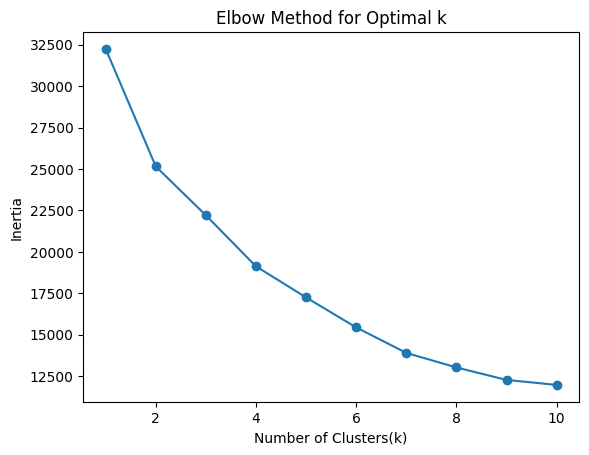

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia=[]
k_values=range(1,11)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values,inertia,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
# Apply K-Means clustering with optimal k (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

In [8]:
df.head()

,Unnamed: 0,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,1501,0.6880,1980,0.0311,['Nazareth'],0.615,216253,0.834,0,4HoTskE5N0oEM4CKRfuzFI,...,7,0.1430,-5.726,1,Holiday,29,1980,0.0318,131.606,2
1,2586,0.0391,1942,0.9890,"['Giacomo Puccini', 'Leontyne Price', 'Erich L...",0.290,299120,0.167,0,2VtUcZ1yowXnhotD3yPAaW,...,1,0.2900,-15.035,1,"Un bel dì (From ""Madama Butterfly"")",0,1942,0.0450,104.500,1
2,2653,0.9620,1950,0.6350,['La Sonora Santanera'],0.679,181933,0.486,0,0rd7q2ibicTeKNbLUl3gTV,...,7,0.3610,-10.397,0,Pena Negra,27,1950,0.0337,131.198,2
3,1055,0.5900,1971,0.2420,['Jimi Hendrix'],0.460,249920,0.720,0,11t59LqOhOEG40yqALXZon,...,1,0.5280,-11.263,1,Ezy Ryder,38,1971,0.0525,123.548,0
4,705,0.8520,2005,0.1390,['Alabama'],0.747,214880,0.460,0,6WJKrF37Bz6CKr3fOtxJHS,...,7,0.0801,-12.797,1,The Closer You Get,40,2005-05-17,0.0280,114.254,2


Applying PCA so that we can plot n-dimension featured data in 2-D graph

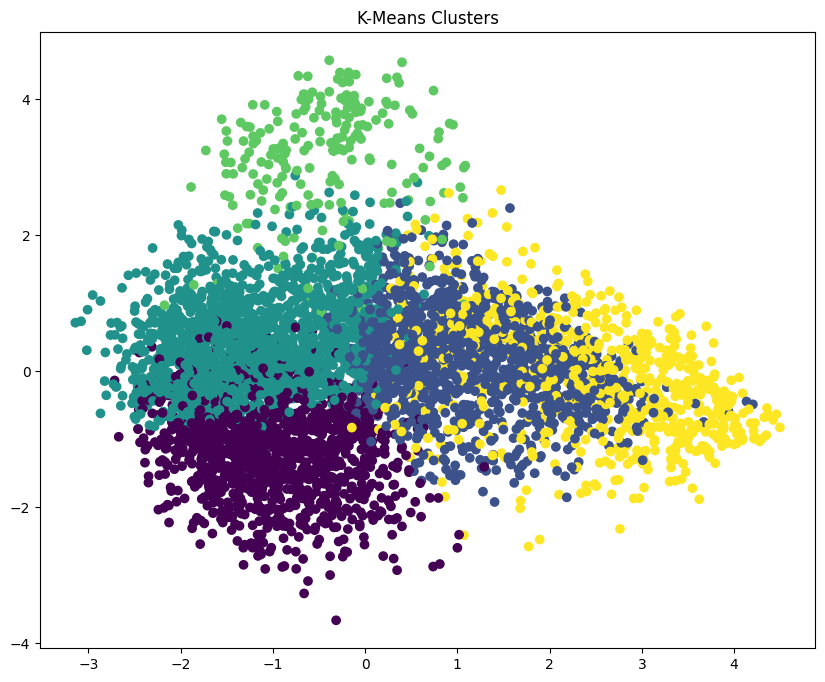

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Check if the song exists in the dataset
    if song_name not in df["name"].values:
        return f"Song '{song_name}' not found in the dataset."
    
    # Get the cluster of the input song
    song_cluster = df[df["name"] == song_name]["Cluster"].values[0]
    
    # Filter songs from the same cluster
    same_cluster_songs_df = df[df["Cluster"] == song_cluster].reset_index(drop=True) # starts from 0
    
    # Find the index of the input song in the RESET index dataframe
    song_index = same_cluster_songs_df[same_cluster_songs["name"] == song_name].index[0]
    
    # Calculate similarity within the cluster (assuming numerical_features is defined elsewhere)
    cluster_features_df = same_cluster_songs_df[numerical_features]
    similarity = cosine_similarity(cluster_features_df, cluster_features_df)

#     similarity = [
#     [1.0,  0.86, 0.92],  # How similar song 0 is to songs 0, 1, and 2
#     [0.86, 1.0,  0.79],  # How similar song 1 is to songs 0, 1, and 2
#     [0.92, 0.79, 1.0]    # How similar song 2 is to songs 0, 1, and 2
# ]
    
    # Get top recommendations (excluding the song itself)
    similar_indices = np.argsort(similarity[song_index])[::-1]
    # Remove the input song (which would be the first/most similar)
    similar_indices = similar_indices[1:num_recommendations+1]
    
    recommendations = same_cluster_songs.iloc[similar_indices][["name", "year", "artists"]]
    return recommendations

input_song = "Bitch to the Boys"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)
recommended_songs

,name,year,artists
426,Chella llà - Instrument and base Version,1942,['Orchestra Studio 7']
589,Camby Bolongo,1977,['Idris Muhammad']
1455,"Aragon - From The ""Coffy"" Soundtrack",1973,['Roy Ayers']
732,Sitting Pretty,1972,['Ralph Burns']
437,Ll'addio - Instrument and base Version,1942,['Orchestra Studio 7']


In [16]:
# Example usage
input_song =  "Bitch to the Boys"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

recommended_songs

IndexError: index 4994 is out of bounds for axis 0 with size 1570